<a href="https://www.kaggle.com/code/kunalkishore01/knn-imputation-with-titanic-dataset?scriptVersionId=216999014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Handling Missing Values using KNN Imputation**

KNN (K-Nearest Neighbors) Imputation is a technique used to handle the missing values in a dataset. It identifies the k nearest neighbors (most similar data points) from  the given missing value record and use the value of nearest neighbors to impute the missing observations.  

**How it works:**  
It identifies the k nearest neighbors based on the distance metric from the observation which is called nan-euclidean distance
Calculating nan_euclidean distance  
dist(x,y) = sqrt(weight * sq. distance from present coordinates)  
where, weight = Total # of coordinates / # of present coordinates
For example, the distance between [3, na, na, 6] and [1, na, 4, 5] is:
sqrt( 4/3((3-1)^2+(6-5)^2)))
Example taken from sklearn documentation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train=train.drop(columns =['PassengerId','Name','Ticket','Cabin','Parch','Sex','Embarked'])
test=test.drop(columns =['PassengerId','Name','Ticket','Cabin','Parch','Sex','Embarked'])

In [5]:
X_train=train.drop(columns = ['Survived'])
y_train=train['Survived']
X_test=train.drop(columns = ['Survived'])
y_test=train['Survived']

**Missing Value Imputation**

Each sample’s missing values are imputed using the value from n-neighbors nearest neighbors found in the training set either by giving equal weights to the distances or inverse distance weights.  
Key Parameters:  

1)	Number of neighbouring samples to use for imputation.  
2)	Weight function tells us how the calculated distance is treated, two possible values – uniform and distance  
3)	In unform weights all the distance are given equal weightages  
4)	In the distance parameter – it gives the weight points by the inverse of their distances i.e. close neighbours will have higher impact on the imputed value


In [6]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [7]:
# weights = ['uniform','distnce']
for i in range(2,6):
    knn_imputer = KNNImputer(n_neighbors=i,weights = 'uniform')
    si= SimpleImputer(strategy='mean')
    X_train_trf = knn_imputer.fit_transform(X_train)
    X_trest_trf = knn_imputer.fit_transform(X_test)

    X_train_trf_si = si.fit_transform(X_train)
    X_trest_trf_si = si.fit_transform(X_test)

    lr = LogisticRegression()


    lr.fit(X_train_trf,y_train)
    lr.fit(X_train_trf_si,y_train)
    y_pred=lr.predict(X_trest_trf)
    y_pred_si=lr.predict(X_trest_trf_si)
    print(f"Accuracy with {i} neighbors: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy with mean simple imputer: {accuracy_score(y_test, y_pred_si):.4f}")

Accuracy with 2 neighbors: 0.7003
Accuracy with 3 neighbors: 0.7003
Accuracy with 4 neighbors: 0.6992
Accuracy with 5 neighbors: 0.6981
Accuracy with mean simple imputer: 0.6981


In [8]:
X_train_trf_knn_df=pd.DataFrame(X_train_trf,columns = X_train.columns)
X_train_trf_si_df=pd.DataFrame(X_train_trf_si,columns = X_train.columns)
X_train['Age_si']=X_train_trf_si_df['Age']
X_train['Age_knn']=X_train_trf_knn_df['Age']

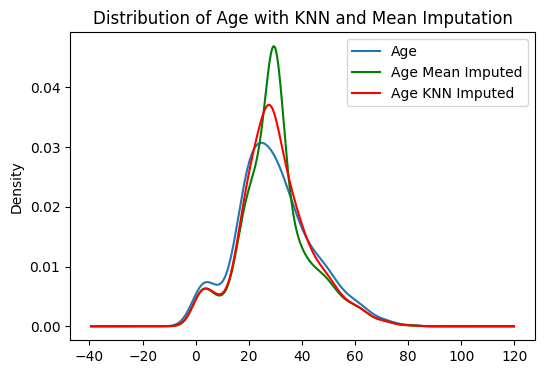

----------------------
Variance of Age : 211.01912474630802
Variance of Age_si : 169.0523999372108
Variance of Age_knn : 177.85232661981613


In [9]:
plt.figure(figsize = (6,4))
ax=plt.subplot(1,1,1)
X_train['Age'].plot(kind='kde',ax=ax, label = 'Age')
X_train['Age_si'].plot(kind='kde',ax=ax, color = 'green',label = 'Age Mean Imputed')
X_train['Age_knn'].plot(kind='kde',ax=ax, color = 'red',label = 'Age KNN Imputed')
ax.legend()
plt.title("Distribution of Age with KNN and Mean Imputation")
plt.show()
print("----------------------")
print("Variance of Age :",X_train['Age'].var())
print("Variance of Age_si :",X_train['Age_si'].var())
print("Variance of Age_knn :",X_train['Age_knn'].var())

**How it impacts the data distribution? Mean Imputation Vs KNN Imputations**    

1)	In Mean Imputation, all missing values of the column are replaced with mean. This can lead to a spike at the mean value, distorting the natural distribution of the feature  
2)	In KNN Imputation missing values are filled with similar data points nearer to the missing values so it avoids the spike in the mean area and distribution is better preserved (relatively smooth)  
3)	Mean Imputation ignore outliers and relationship with other feature which gets accounted in KNN based imputation  
4)	Variance gets reduced with the mean imputation, since all the missing values are replaced by a single mean value.   There is a comparatively lesser decrease in variance in KNN Imputation compared to mean imputation so spread is likely to be preserved

**Disadvantage**:  
In production we need to keep all the training dataset which consumes high space and increases processing time with the huge dataset

